In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

conn = sqlite3.connect('data/mimicdata.sqlite')


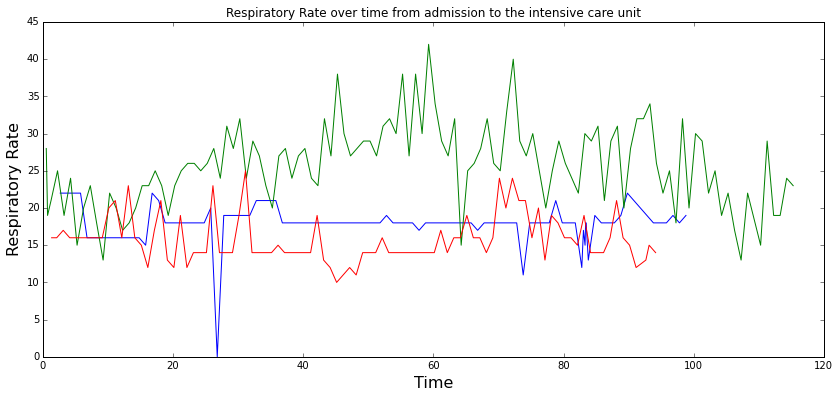

In [10]:


data = []
for subject_id in [40084, 40080, 40004]:
    
    query = """
    SELECT de.icustay_id
      , (strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS
      , di.label
      , de.value
      , de.valuenum
      , de.uom
    FROM chartevents de
    INNER join d_items di
    ON de.itemid = di.itemid
    INNER join icustays ie
    ON de.icustay_id = ie.icustay_id
    WHERE de.subject_id = """ + str(subject_id) + """
    ORDER BY charttime;
    """

    ce = pd.read_sql_query(query,conn)

    valueName = "Respiratory Rate";
    
    # Set x equal to the times
    x_hr = ce.HOURS[ce.LABEL==valueName]

    # Set y equal to the heart rates
    y_hr = ce.VALUENUM[ce.LABEL==valueName]

    # Plot time against heart rate
    plt.figure(figsize=(14, 6))
    data.append([x_hr,y_hr]);
    
for patient in data:
    plt.plot(patient[0], patient[1]);

plt.xlabel('Time',fontsize=16)
plt.ylabel(valueName,fontsize=16)
plt.title(valueName + ' over time from admission to the intensive care unit')

